In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/archive.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:

len(os.listdir('/tmp/animals/animals'))

5490

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import glob, shutil
import random
import pandas as pd
from pathlib import Path
from PIL import Image

In [ ]:

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]
sub=get_immediate_subdirectories('/tmp/animals/animals')
print(len(sub))




90


In [ ]:
os.getcwd()
for subfolder in sub:
  collection = '/tmp/animals/animals/'+subfolder
  for i, filename in enumerate(os.listdir(collection)):
      os.rename('/tmp/animals/animals/'+subfolder +'/'+ filename, '/tmp/animals/animals/'+subfolder + str(i) + ".jpg")


In [ ]:
imagenames_list=[]
dir='/tmp/animals/animals/'
for f in glob.glob(dir+'/*.jpg'):
    imagenames_list.append(f)

rd=random.sample(imagenames_list, 100)
print(rd)

['/tmp/animals/animals/caterpillar46.jpg', '/tmp/animals/animals/cow2.jpg', '/tmp/animals/animals/lobster31.jpg', '/tmp/animals/animals/octopus0.jpg', '/tmp/animals/animals/woodpecker32.jpg', '/tmp/animals/animals/kangaroo19.jpg', '/tmp/animals/animals/donkey51.jpg', '/tmp/animals/animals/eagle19.jpg', '/tmp/animals/animals/pig47.jpg', '/tmp/animals/animals/lizard18.jpg', '/tmp/animals/animals/porcupine23.jpg', '/tmp/animals/animals/zebra13.jpg', '/tmp/animals/animals/badger11.jpg', '/tmp/animals/animals/orangutan27.jpg', '/tmp/animals/animals/seahorse56.jpg', '/tmp/animals/animals/reindeer46.jpg', '/tmp/animals/animals/crab10.jpg', '/tmp/animals/animals/mosquito44.jpg', '/tmp/animals/animals/goldfish5.jpg', '/tmp/animals/animals/whale12.jpg', '/tmp/animals/animals/turkey47.jpg', '/tmp/animals/animals/oyster33.jpg', '/tmp/animals/animals/bee9.jpg', '/tmp/animals/animals/pelecaniformes40.jpg', '/tmp/animals/animals/badger9.jpg', '/tmp/animals/animals/grasshopper37.jpg', '/tmp/animals/an

In [ ]:
read_images = []        

for image in rd:
  read_images.append(cv2.resize(cv2.imread(image),(224,224)))

In [ ]:
np.array(read_images).shape


(100, 224, 224, 3)

In [ ]:
read_images

[array([[[  0,  18,  15],
         [  0,  19,  16],
         [  0,  20,  17],
         ...,
         [ 20,  56,  63],
         [ 20,  57,  61],
         [ 15,  52,  56]],
 
        [[  0,  19,  16],
         [  0,  19,  16],
         [  0,  20,  17],
         ...,
         [ 20,  56,  63],
         [ 21,  56,  60],
         [ 19,  54,  57]],
 
        [[  0,  19,  16],
         [  0,  20,  17],
         [  0,  21,  18],
         ...,
         [ 23,  57,  62],
         [ 23,  57,  59],
         [ 23,  57,  59]],
 
        ...,
 
        [[  0,  55,  35],
         [  0,  57,  36],
         [  0,  58,  38],
         ...,
         [ 78, 166, 169],
         [ 76, 160, 165],
         [ 73, 157, 162]],
 
        [[  0,  55,  34],
         [  0,  56,  35],
         [  0,  57,  37],
         ...,
         [ 78, 165, 168],
         [ 76, 160, 164],
         [ 72, 156, 162]],
 
        [[  0,  55,  34],
         [  0,  55,  35],
         [  0,  56,  36],
         ...,
         [ 78, 165, 168],
  

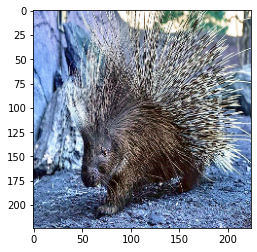

In [ ]:
plt.imshow(read_images[10])

In [ ]:
images=np.array(read_images)

images = [cv2.resize(cv2.imread(file), (224, 224)) for file in rd]
paths = [file for file in rd]
images = np.array(np.float32(images).reshape(len(images), -1)/255)


In [ ]:
model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet',input_shape=(224, 224, 3))
predictions = model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

In [ ]:
k = 9 
# K-Means clustering
kmodel = KMeans(n_clusters=k, random_state=888)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
print(kpredictions) # Predicted categories



[4 7 1 5 7 5 5 4 5 7 8 7 0 7 0 5 7 4 5 7 4 7 7 4 0 5 4 7 5 5 7 7 8 7 7 5 7
 7 7 8 7 5 5 2 7 0 7 7 7 4 7 7 7 7 7 7 7 7 7 7 0 5 7 7 7 7 7 4 7 7 4 7 5 4
 5 0 7 3 0 5 7 6 4 7 7 7 7 7 7 5 0 7 7 4 8 5 7 7 7 4]


In [ ]:
shutil.rmtree('/Users/nicolexu/Desktop/animals')

In [ ]:

#Save the sorted images to a different folder

for i in range(k):
    os.makedirs(r"/Users/nicolexu/Desktop/animals/cluster" + str(i))
# Copy the file, keeping the metadata shutil.copy2('source file', 'destination address')
for i in range(len(paths)):
    if kpredictions[i] == 0:   
        shutil.copy2(paths[i], r"/Users/nicolexu/Desktop/animals/cluster0")
    elif kpredictions[i] == 1:   
        shutil.copy2(paths[i], r"/Users/nicolexu/Desktop/animals/cluster1")
    elif kpredictions[i] == 2:   
        shutil.copy2(paths[i], r"/Users/nicolexu/Desktop/animals/cluster2")
    elif kpredictions[i] == 3:   
        shutil.copy2(paths[i], r"/Users/nicolexu/Desktop/animals/cluster3")
    elif kpredictions[i] == 4:   
        shutil.copy2(paths[i], r"/Users/nicolexu/Desktop/animals/cluster4")
    elif kpredictions[i] == 5:   
        shutil.copy2(paths[i], r"/Users/nicolexu/Desktop/animals/cluster5")
    elif kpredictions[i] == 6:   
        shutil.copy2(paths[i], r"/Users/nicolexu/Desktop/animals/cluster6")
    elif kpredictions[i] == 7:   
        shutil.copy2(paths[i], r"/Users/nicolexu/Desktop/animals/cluster7")
    elif kpredictions[i] == 8:   
        shutil.copy2(paths[i], r"/Users/nicolexu/Desktop/animals/cluster8")

In [ ]:

folder="/Users/nicolexu/Desktop/animals/cluster0"
try:
    print(os.path.exists(folder))
except:
    if not os.path.exists(folder):
        print("Creating Folder of cluster.")
        os.makedirs(folder)
        

True


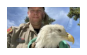

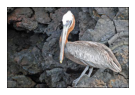

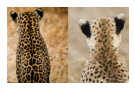

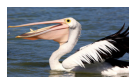

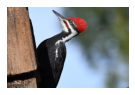

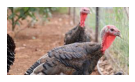

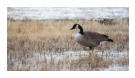

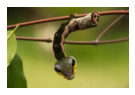

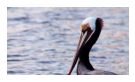

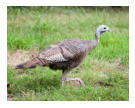

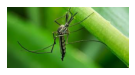

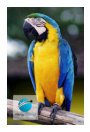

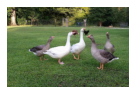

<Figure size 720x720 with 0 Axes>

In [ ]:

from keras.preprocessing.image import load_img 
clus_list=[]
for f in glob.glob('/Users/nicolexu/Desktop/animals/cluster4/*.jpg'):
    clus_list.append(f)
files=clus_list
# plot each image in the cluster
for index, file in enumerate(files):
    #plt.subplot(10,5,index+1,figsize=(15,15))
    plt.subplot(4, 4,index+1)

    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')
    plt.figure(figsize=(10,10))

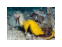

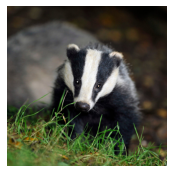

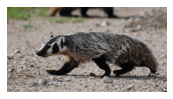

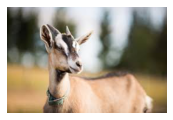

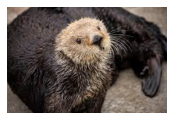

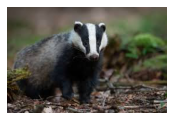

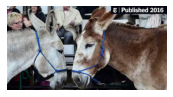

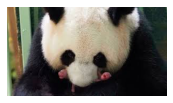

<Figure size 1440x1440 with 0 Axes>

In [ ]:
clus_list=[]
for f in glob.glob('/Users/nicolexu/Desktop/animals/cluster0/*.jpg'):
    clus_list.append(f)
files=clus_list
# plot each image in the cluster
for index, file in enumerate(files):
    plt.subplot(3, 6,index+1)

    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')
    plt.figure(figsize=(20,20))